In [2]:
import sys
import warnings
from distutils.version import LooseVersion

import numpy as np
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

import network
import utils

%matplotlib inline

In [4]:
tf.reset_default_graph()

#cp_dir = '/Users/cjw/Projects/cjw/Gerton/tpo/checkpoints/'
cp_dir = '/home/cjw/disk2cjw/PythonLib/cjwdeeplearning/autoencoder/checkpoint-2018-03-06-10-42-45/'
#checkpoint-2018-03-02-16-31-42/'
width = 64
height = 64
nchannels = 1
channels = [0]
#nepochs = params['nepochs']
batchsize = 32
learning_rate = 0.00005
#restore = params['restore']
latent_size = 128
enc_sizes = [(64, 5), (128, 3), (256,3), (512,3)] #, (64, 3), (128,3)] #, (32, 3), (64, 3)]
dec_sizes = list(reversed(enc_sizes))
# enc_sizes = [(64, 5), (128, 3), (256,3), (512,3)]
# dec_sizes = list(reversed(enc_sizes))

images = tf.placeholder(tf.float32, (None, height, width, nchannels))
z = tf.placeholder(tf.float32, (None, latent_size))

enc = network.encoder(images, latent_size, droprate=.7, is_train=False,
                      nfilters=enc_sizes)
sdd = network.decoder(enc, nchannels=nchannels, width=width, droprate=.7,
                      is_train=False, nfilters=dec_sizes)

loss = network.ae_loss(images, sdd, nchannels=nchannels,
                       latent_size=latent_size, width=width)

opt = network.model_opt(loss, learning_rate)

saver = tf.train.Saver()
# test_batch, _, _ = utils.getbatch(mmdict, df, len(df) // batchsize,
#                                   batchsize, width, nchannels,
#                                   channels=channels)

sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.import_meta_graph(cp_dir + 'autoencoder-128x-18660.meta') #autoencoder-64x-18660.meta')
saver.restore(sess, tf.train.latest_checkpoint(cp_dir + ''))
saver

Encoder False
[<tf.Tensor 'Placeholder:0' shape=(?, 64, 64, 1) dtype=float32>, <tf.Tensor 'Maximum:0' shape=(?, 32, 32, 64) dtype=float32>, <tf.Tensor 'Maximum_1:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'Maximum_2:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'Maximum_3:0' shape=(?, 4, 4, 512) dtype=float32>] Tensor("latent_space/BiasAdd:0", shape=(?, 128), dtype=float32)
isize:  4 64
[<tf.Tensor 'Maximum_4:0' shape=(?, 8192) dtype=float32>, <tf.Tensor 'Reshape:0' shape=(?, 4, 4, 512) dtype=float32>, <tf.Tensor 'Maximum_5:0' shape=(?, 8, 8, 256) dtype=float32>, <tf.Tensor 'Maximum_6:0' shape=(?, 16, 16, 128) dtype=float32>, <tf.Tensor 'Maximum_7:0' shape=(?, 32, 32, 64) dtype=float32>] Tensor("decoder_out/BiasAdd:0", shape=(?, 64, 64, 1), dtype=float32)
INFO:tensorflow:Restoring parameters from /home/cjw/disk2cjw/PythonLib/cjwdeeplearning/autoencoder/checkpoint-2018-03-06-10-42-45/autoencoder-128x-18660


In [5]:

datadir = "/home/cjw/disk2cjw/Data/cyto/"
mmfilename = datadir + "Fish6_15_cjw_mean_zero.mm"

mmheader = np.memmap(mmfilename, dtype="int32", mode='r',
                    shape=(4,))

header_shape = mmheader.shape
print(header_shape, mmheader)
xshape = [mmheader[0], mmheader[1], mmheader[2], mmheader[3]]
#xshape[0] = 2400
xshape = tuple(xshape)
del mmheader

n = xshape[0]
ids =  range(n)
file = n*['Fish6_15_cjw_64.tif']
fid = range(n)
mmfile = n*['Fish6_15_cjw_64.tif.mm']
plate = n*[0]
row = n*[0]
column = n*[0]
field = n*[0]
yc = n*[32]
xc = n*[32]
well = n*[0]

df = pd.DataFrame({'id':ids, 'fid':fid, 'file':file, 'mmfile':mmfile, 'plate':plate,
                 'row':row, 'column':column, 'field':field,
                  'yc':yc, 'xc':xc, 'well':well})

df.head()

(4,) [10000    64    64     1]


,column,fid,field,file,id,mmfile,plate,row,well,xc,yc
0,0,0,0,Fish6_15_cjw_64.tif,0,Fish6_15_cjw_64.tif.mm,0,0,0,32,32
1,0,1,0,Fish6_15_cjw_64.tif,1,Fish6_15_cjw_64.tif.mm,0,0,0,32,32
2,0,2,0,Fish6_15_cjw_64.tif,2,Fish6_15_cjw_64.tif.mm,0,0,0,32,32
3,0,3,0,Fish6_15_cjw_64.tif,3,Fish6_15_cjw_64.tif.mm,0,0,0,32,32
4,0,4,0,Fish6_15_cjw_64.tif,4,Fish6_15_cjw_64.tif.mm,0,0,0,32,32


In [6]:


mf = df['mmfile']
umf = list(mf.unique())
print(umf)
#df = df.replace(umf, ["plate03_all.mm"])

m2 = np.memmap(mmfilename, dtype='float32', offset=128,
              mode='r', shape=xshape)

mmdict = {"Fish6_15_cjw_64.tif.mm": m2}

['Fish6_15_cjw_64.tif.mm']


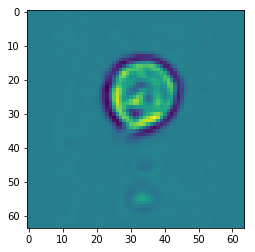

In [7]:
plt.imshow(m2[451,:,:,0])

10000
(10000, 128) (10000, 64, 64, 1)
-0.192567110062 1.30953907967


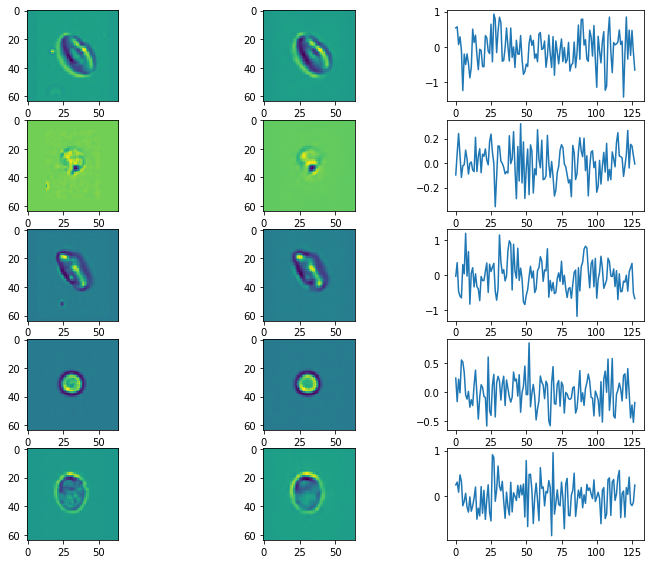

In [8]:
vv = utils.getWell(mmdict,
                    df, width, 0, 0, nchannels, channels=channels)

print(len(vv))
xhe = sess.run(enc, feed_dict={images:vv})
xdd = sess.run(sdd, feed_dict={enc:xhe})
f = plt.figure(figsize=(12, 40))
print(xhe.shape, xdd.shape)
print(np.amin(vv),np.amax(vv))
for i in range(5):
    ix = i + 40
    plt.subplot(20,3,i*3 + 1)
    plt.imshow(vv[ix,:,:,0])
    plt.subplot(20,3,i*3 + 2)
    plt.imshow(xdd[ix,:,:,0])
    plt.subplot(20,3,i*3 + 3)
    plt.plot(xhe[ix])

In [9]:
# dv = {0:(3,4), 1:(4,3), 2:(6,7), 3:(7,13), 4:(7, 2), 5:(8,3), 6:(12,4), 7:(9,5)}
#dv = {0:(12,4), 1:(9,5), 2:(11,8), 3:(4,19), 4:(13,13), 5:(13,8), 6:(2,4), 7:(9,5)}
dv = {0:(0,0)} #, 1:(9,4) , 2:(11,8), 3:(4,19), 4:(13,13), 5:(13,8), 6:(2,4), 7:(9,5)}
dimages = dict()
counter = 0
one = 0
for k in dv.keys():
    i, j = dv[k]
    print(i, j)
    r = i + 1
    cm = j + 1
    try:
        k = utils.getWell(mmdict,df, width, 0, 0, nchannels, channels=[0])
        print(len(k))
    except:
        print("Oh no!!")
        continue
    hek = sess.run(enc, feed_dict={images:k})
    dimages[counter] = k
    if one == 0:
        one = 1
        g = hek
        colors = np.zeros(k.shape[0])
        counter += 1
        print(i, j, g.shape, hek.shape)
    else:
        print(i, j, g.shape, hek.shape)
        g = np.concatenate((g,hek))
        colors = np.concatenate((colors, counter + np.zeros(k.shape[0])))
        counter += 1

#perm = np.random.permutation(len(colors))
g_all = g #g[perm]
#colors = colors[perm]
g_all.shape

0 0
10000
0 0 (10000, 128) (10000, 128)


(10000, 128)

In [10]:
from matplotlib.colors import LinearSegmentedColormap
import matplotlib as mpl
clist = [(.2,.2,.2),
         (172/255,25/255,210/255),
         (255/255, 165./255, 0),
         (.5, .5, .5),
         (44/255,25/255,210/255),
         (134/255, 165./255, 56/255),
         (26/255,188/255,255/255),
         (188/255,255/255, 26/255)]

mycmap = LinearSegmentedColormap.from_list(
        'mycmap', clist, N=len(clist))

bounds = np.linspace(0, len(clist), len(clist) + 1)
norm = mpl.colors.BoundaryNorm(bounds, mycmap.N)
print(bounds, mycmap.N)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.] 8


In [11]:
g = g_all
print(norm)
g.shape, g.dtype

((10000, 128), dtype('float32'))

[[ 0.14698893  0.18661328 -0.06034991 ..., -0.14649841  0.05020849
  -0.08737671]
 [-0.22100195 -0.35581082  0.59561133 ...,  0.57148623 -0.07642612
  -0.19109866]
 [-0.29938617  0.01902306  0.08127072 ..., -0.08040351  0.09773577
   0.26285696]
 ..., 
 [ 0.29068482 -0.0081774   0.02364605 ..., -0.03042261 -0.05627811
  -0.79886866]
 [ 0.28679296  0.01678509  0.09032245 ..., -0.17415226  0.44651818
  -0.37849191]
 [ 0.6248762  -0.73978114  0.23672503 ...,  0.0392942  -0.06535076
   0.24652737]]
(10000, 16)
[ 0.05255704  0.04197581  0.03223091  0.03110793  0.02752281  0.02552819
  0.02528273  0.02453423  0.02210911  0.0209198   0.02013297  0.01921938
  0.01856481  0.01751285  0.01723508  0.01707981]
[ 0.89169269  0.71216952  0.54683571  0.527783    0.46695715  0.43311612
  0.4289516   0.41625242  0.37510728  0.35492934  0.34157978  0.32607967
  0.314974    0.29712638  0.29241361  0.28977927]
(16, 128)
22
90


(10000, 16)

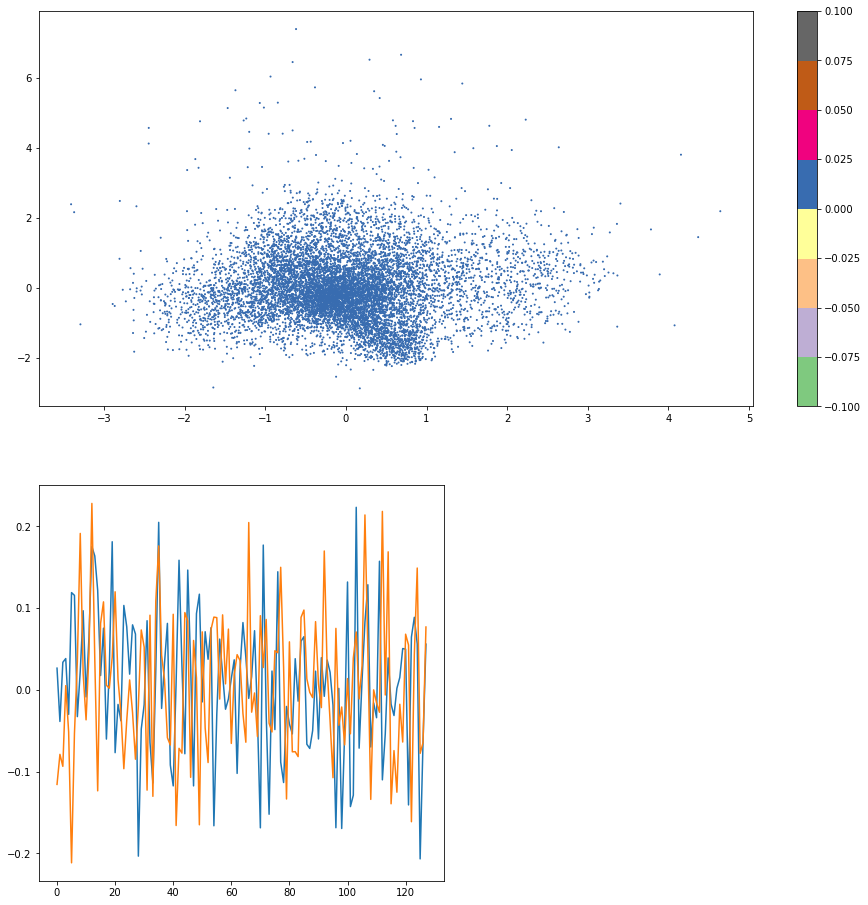

In [59]:
from sklearn.decomposition import PCA
print(g_all)
pca = PCA(n_components=16, svd_solver='arpack', whiten=True, copy=True)
gfit = pca.fit_transform(g_all)
print(gfit.shape)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
print(pca.components_.shape)

print(np.argmin(pca.mean_))
print(np.argmax(pca.mean_))
sz = 1
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(211)
sc = ax.scatter(gfit[:,0], gfit[:,1], s=sz, c=colors, cmap='Accent')
plt.colorbar(sc) #, cmap=mycmap, norm=norm, spacing='proportional', ticks=bounds,boundaries=bounds)
#sc = ax.scatter(gfit[:,0], gfit[:,1], s=sz, c=colors,cmap="jet")
# plt.colorbar(sc)
ax2 = fig.add_subplot(223)
ppp = ax2.plot(pca.components_[0])
ppp = ax2.plot(pca.components_[1])

gfit.shape

In [16]:
from sklearn.manifold import TSNE
g_emb = TSNE(n_components=2,perplexity=50, learning_rate=200).fit_transform(gfit.astype(np.float64))
g_emb.shape



(10000, 2)

(10000,)


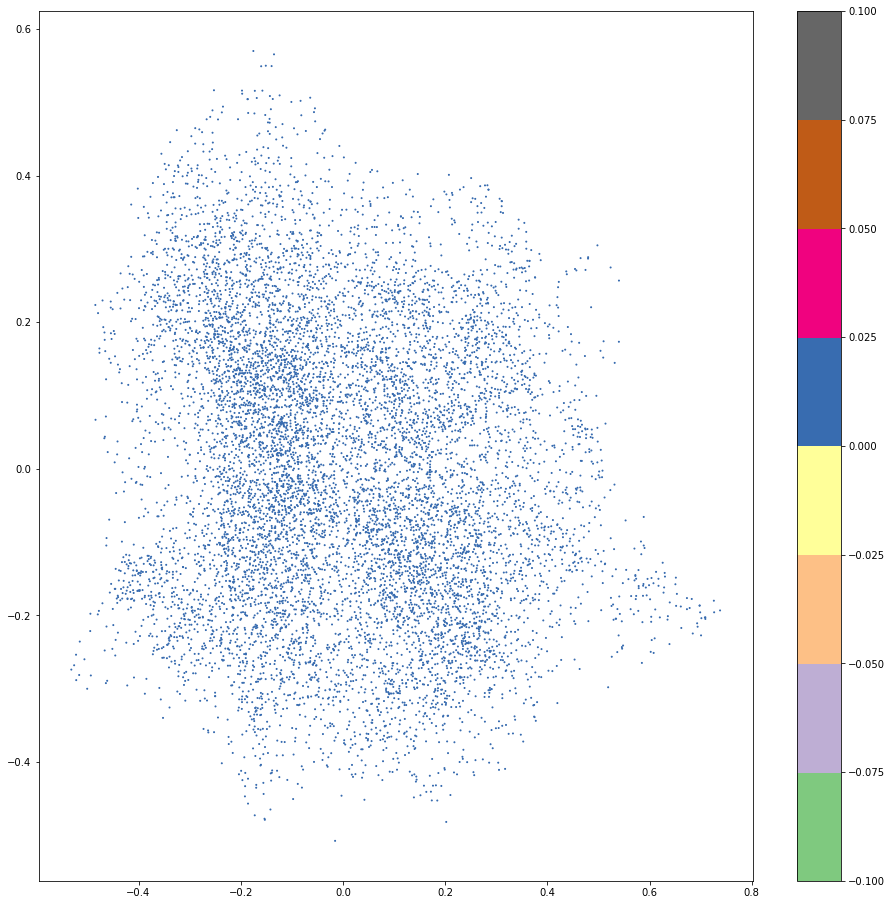

In [17]:
print(colors.shape)
from mpl_toolkits.mplot3d import Axes3D
sz = 12
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
sc = ax.scatter(g_emb[:,0], g_emb[:,1], s=1, c=colors[0:g_emb.shape[0]], cmap='Accent', norm=None)
plt.colorbar(sc)#, cmap=mycmap, norm=norm, spacing='proportional', ticks=bounds,boundaries=bounds)
# plt.savefig("/Volumes/projects/cjw/Chris/Remark/2017_10_28/images/tsne_002.png")

In [18]:
np.where(np.isinf(g_all))

(array([], dtype=int64), array([], dtype=int64))

In [123]:
from sklearn import cluster

km = cluster.KMeans(n_clusters=8).fit_predict(g_all)
# kmt = cluster.KMeans(n_clusters=8).fit_transform(g_all)
agc = cluster.AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage="ward").fit_predict(g_all)
#km = cluster.AffinityPropagation().fit_predict(g_all)
print(np.amax(km))

7


In [41]:
# cy = [clist[z] for z in km]


ximages = utils.getWell(mmdict,df, width, 0, 0, nchannels, channels=[0])
ximages.shape


(10000, 64, 64, 1)

(1011, 64, 64, 1)


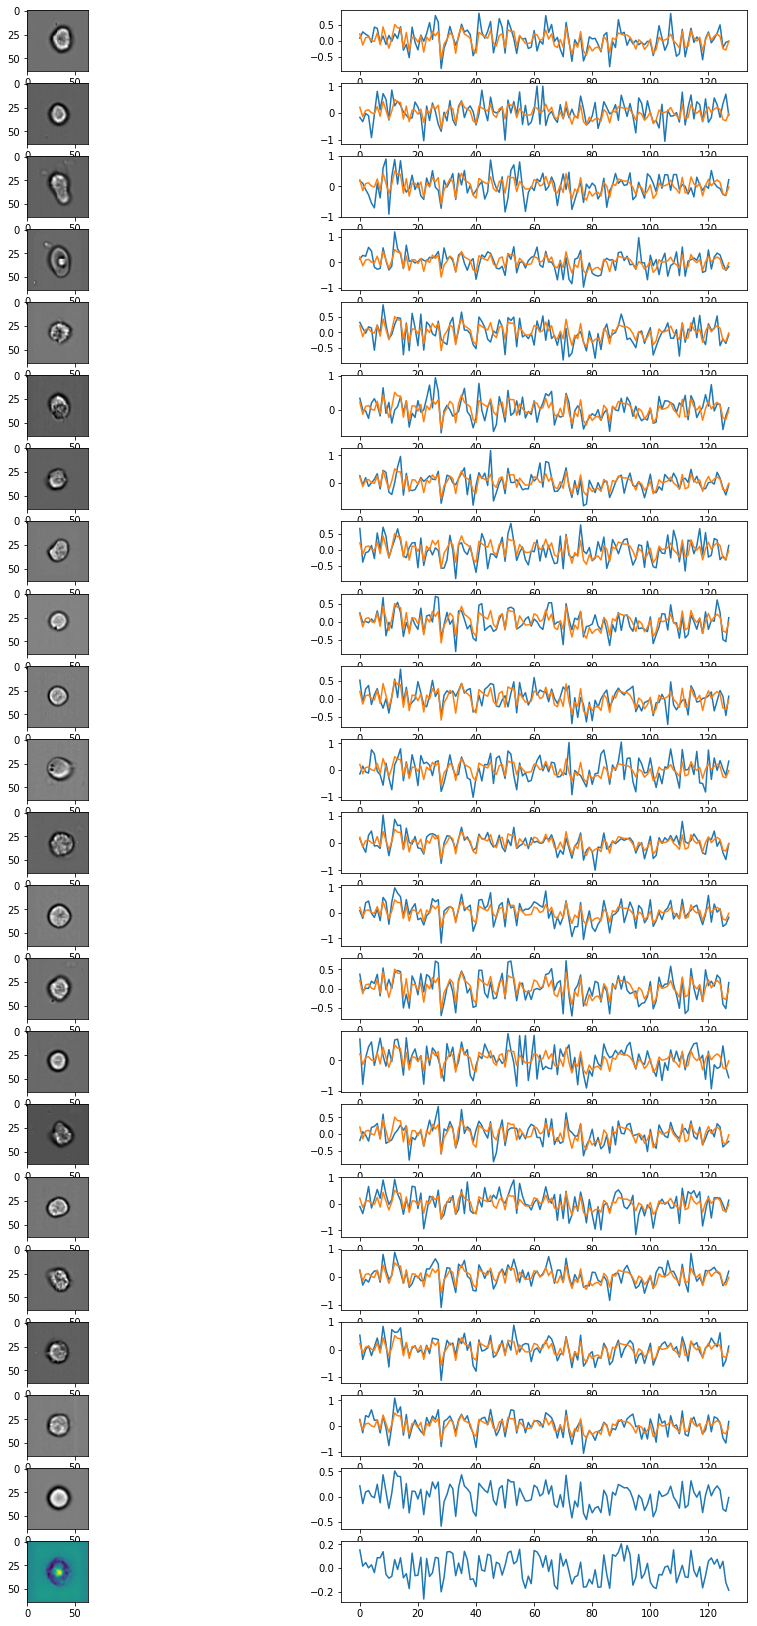

In [134]:
tn = 7
images4 = ximages[km == tn]
g4 = g_all[km == tn]
plt.figure(figsize=(16,40))
print(images4.shape)

gtest = np.mean(g4, axis=0)
gtest = np.expand_dims(gtest.squeeze(), axis=0)
res = sess.run(sdd, feed_dict={enc:gtest})

gav = np.mean(g_all, axis=0)
gav = np.expand_dims(gav.squeeze(), axis=0)
resav = sess.run(sdd, feed_dict={enc:gav})

ppi = 0
for i in range(20):
    ix = i + 1
    plt.subplot(30,2,i*2 + 1)
    plt.imshow(images4[i,:,:,0], cmap='gray')
    plt.subplot(30,2, i*2 + 2)
    plt.plot(g4[ix,:])
    plt.plot(gtest.squeeze())
    ppi += 2

plt.subplot(30,2, ppi+ 1 )
plt.imshow(res.squeeze(), cmap='gray')
plt.subplot(30,2, ppi + 2)
plt.plot(gtest.squeeze())
plt.subplot(30,2, ppi + 3)
plt.imshow(resav.squeeze())
plt.subplot(30,2, ppi + 4)
plt.plot(gav.squeeze())


0 (615, 64, 64, 1)
1 (1399, 64, 64, 1)
2 (3327, 64, 64, 1)
3 (1423, 64, 64, 1)
4 (216, 64, 64, 1)
5 (1188, 64, 64, 1)
6 (821, 64, 64, 1)
7 (1011, 64, 64, 1)


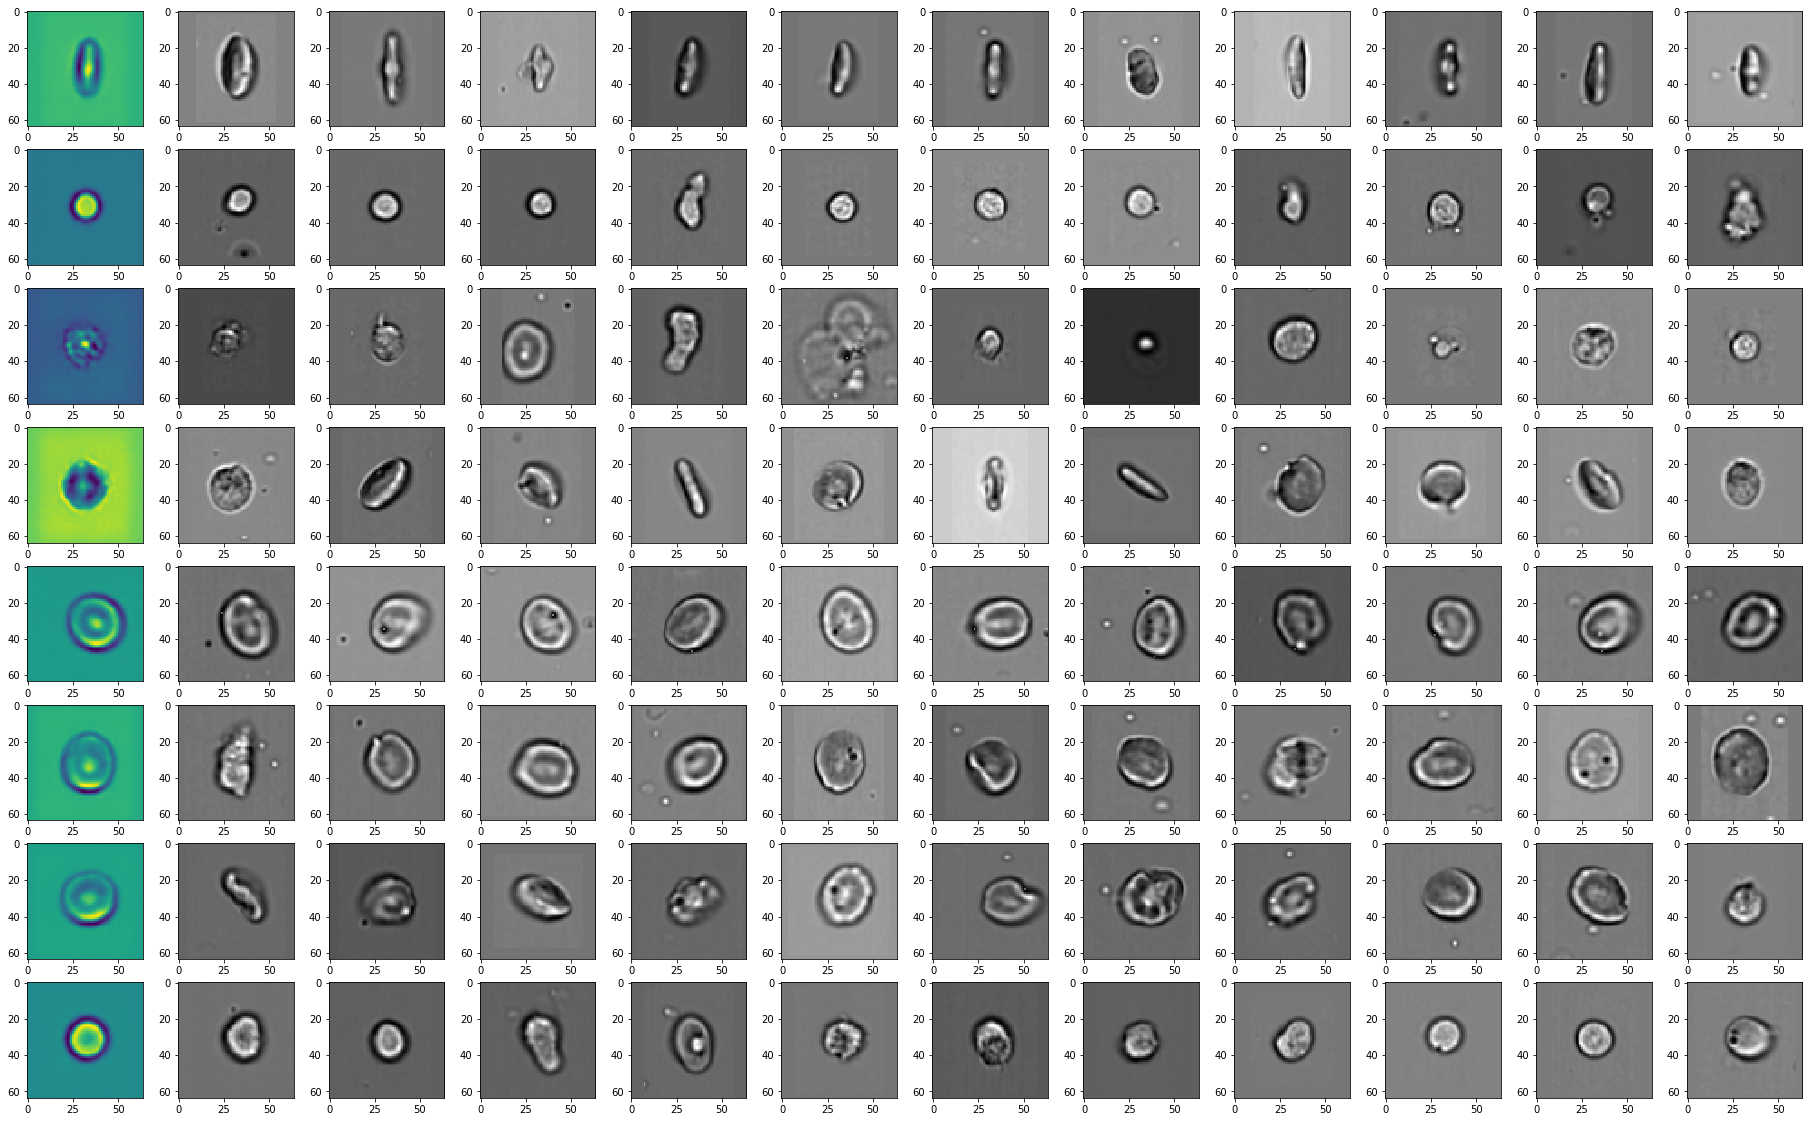

In [124]:
nk = 8
plt.figure(figsize=(32, 2.5*nk))

counter = 1
shift = 0
for k in range(nk):
    row = ximages[km == k]
    print(k, row.shape)
    gk = g_all[km == k]
    gavk = np.mean(gk, axis=0)
    gavk = np.expand_dims(gavk.squeeze(), axis=0)
    resav = sess.run(sdd, feed_dict={enc:gavk})
    plt.subplot(nk, 12, counter)
    plt.imshow(resav.squeeze())
    counter += 1
    for i in range(11):
        plt.subplot(nk, 12, counter)
        counter += 1
        try:
            plt.imshow(row[i+shift,:,:,0], cmap='gray')
        except:
            plt.imshow(np.zeros((64,64)))

0 (1741, 64, 64, 1)
1 (4089, 64, 64, 1)
2 (1485, 64, 64, 1)
3 (415, 64, 64, 1)
4 (973, 64, 64, 1)
5 (103, 64, 64, 1)
6 (901, 64, 64, 1)
7 (293, 64, 64, 1)


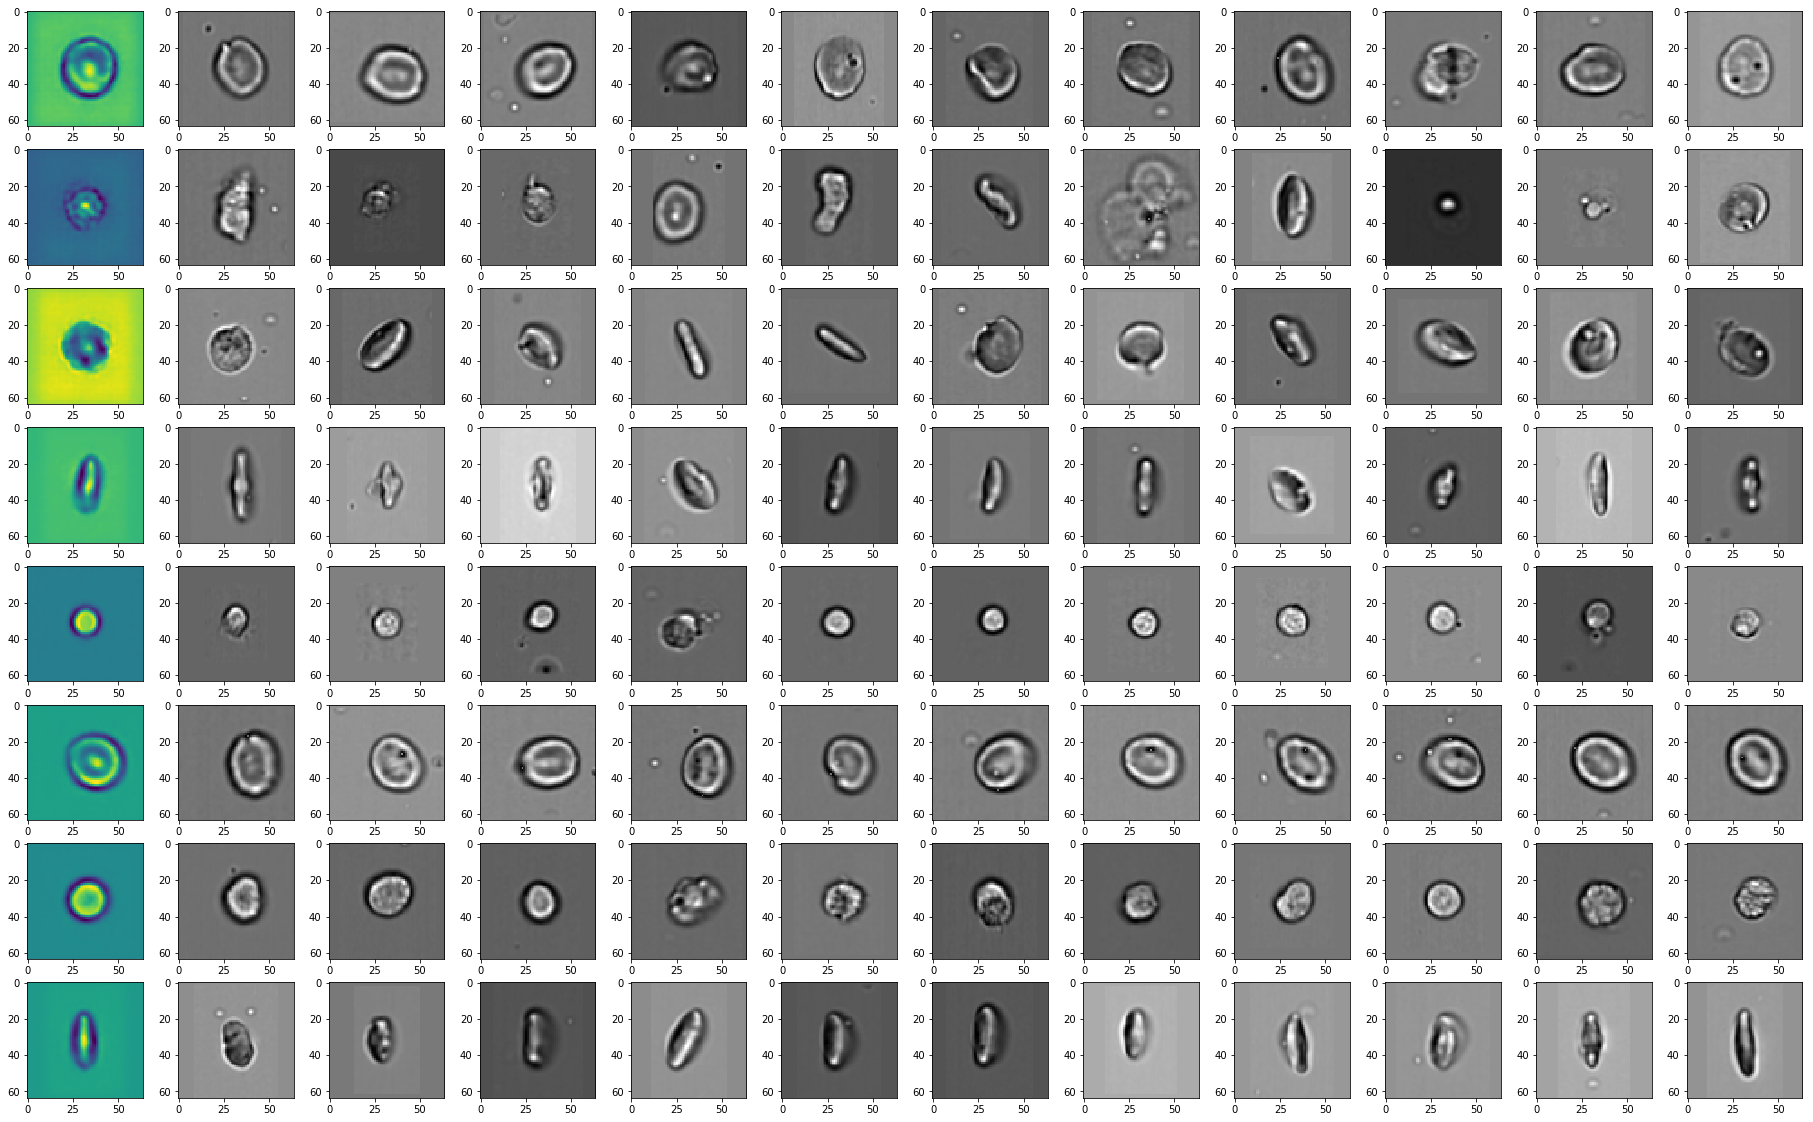

In [125]:
nk = 8
plt.figure(figsize=(32, 2.5*nk))

counter = 1
shift = 0
for k in range(nk):
    row = ximages[agc == k]
    print(k, row.shape)
    gk = g_all[agc == k]
    gavk = np.mean(gk, axis=0)
    gavk = np.expand_dims(gavk.squeeze(), axis=0)
    resav = sess.run(sdd, feed_dict={enc:gavk})
    plt.subplot(nk, 12, counter)
    plt.imshow(resav.squeeze())
    counter += 1
    for i in range(11):
        plt.subplot(nk, 12, counter)
        counter += 1
        try:
            plt.imshow(row[i+shift,:,:,0], cmap='gray')
        except:
            plt.imshow(np.zeros((64,64)))

In [79]:
from sklearn.manifold import TSNE
g_emb = TSNE(n_components=2,perplexity=50, learning_rate=1000).fit_transform(gfit.astype(np.float64))
print(g_emb.shape)



(10000, 2)


(10000,)


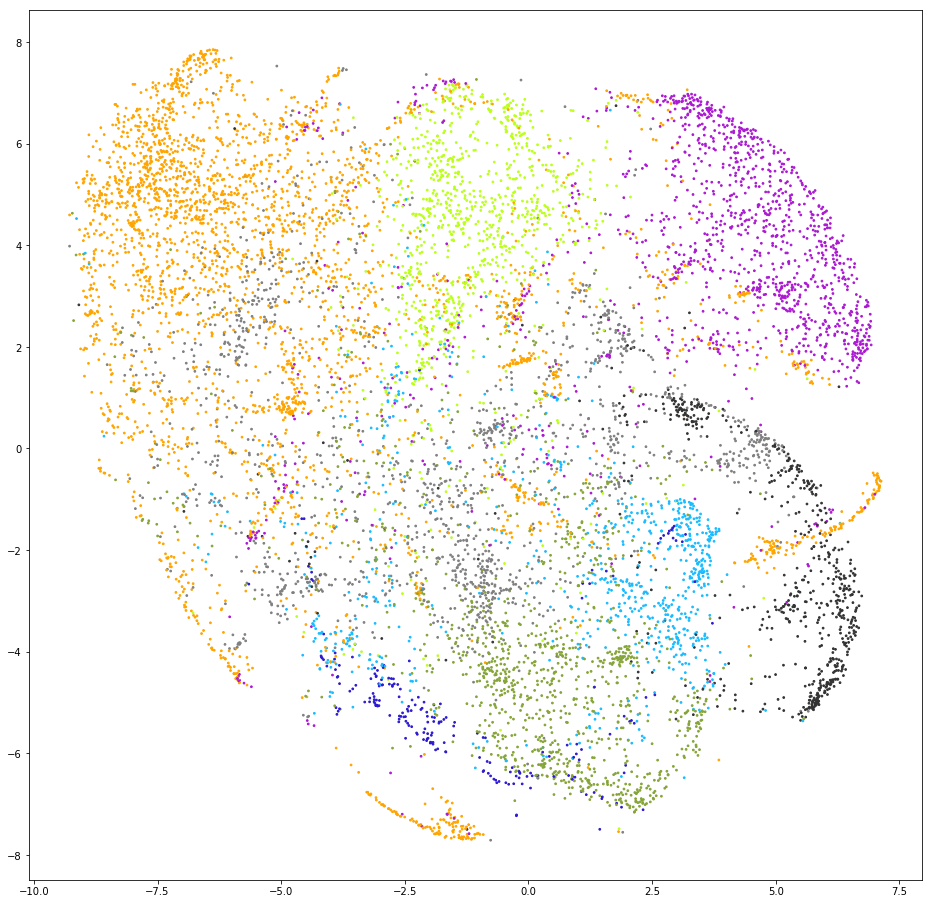

In [126]:
clist2 = clist*2
cy = [clist2[z] for z in km]

print(colors.shape)
#from mpl_toolkits.mplot3d import Axes3D
sz = 12
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
sc = ax.scatter(g_emb[:,0], g_emb[:,1], s=3, c=cy)
#plt.colorbar(sc, ticks=[0,1,2,3,4,5,6,7])#, cmap=mycmap, norm=norm, spacing='proportional', ticks=bounds,boundaries=bounds)
# plt.savefig("/Volumes/projects/cjw/Chris/Remark/2017_10_28/images/tsne_002.png")

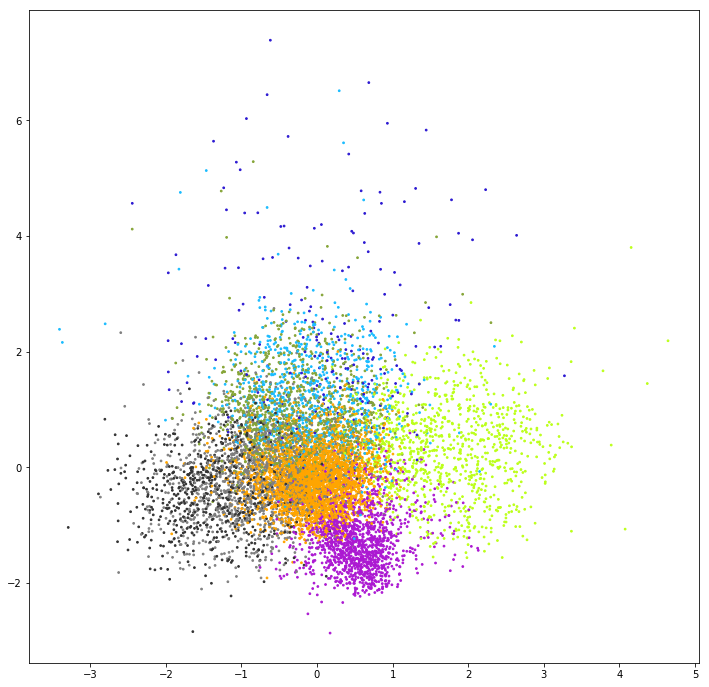

In [127]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
sc = ax.scatter(gfit[:,0], gfit[:,1], s=3, c=cy)